# Model Fits

This notebook is for plotting results

---

In [1]:
import sys
from os.path import join

sys.path.append("/home/edgarmsc/Projects/HaloModelCF/")

import h5py as h5
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from physhalo.config import SRC_PATH, MBINSTRS, NMBINS
from physhalo.cosmology import RHOM, RSOFT
from physhalo.hmcorrfunc.model import power_law

CMAP = mpl.colormaps.get_cmap('inferno')

In [2]:
with h5.File(SRC_PATH + "/data/mass.h5", "r") as hdf_load:
    mass = hdf_load["mass"][()]
M_PIVOT = np.power(10., 14)

## 1. Orbiting Density Profile

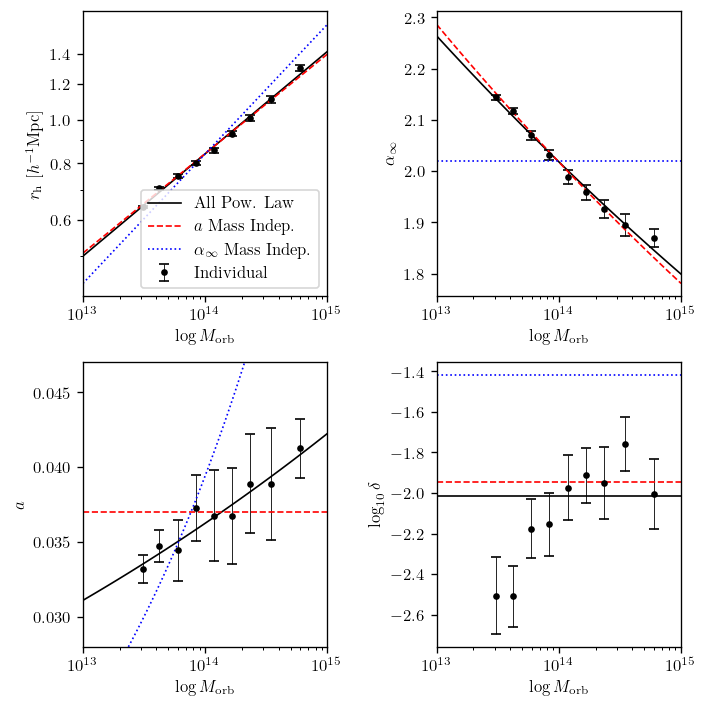

<Figure size 768x576 with 0 Axes>

In [10]:
plabels = [r'$r_{\rm h}~[h^{-1}{\rm Mpc}]$', r'$\alpha_{\infty}$', r'$a$',
           r"$\log_{10}\delta$"]
mass_pred = np.logspace(13, 15, num=100, base=10)

pars = np.zeros((NMBINS, 4))
errs = np.zeros((NMBINS, 4))
with h5.File(SRC_PATH + "/fits/mle_good.h5", 'r') as hdf_load:
    for k, mbin in enumerate(MBINSTRS):
        pars[k, :] = hdf_load[f'max_posterior/orb/{mbin}'][()]
        errs[k, :] = np.sqrt(np.diag(hdf_load[f'covariance/orb/{mbin}'][()]))

with h5.File(SRC_PATH + "/fits/mle_smooth_1.h5", 'r') as hdf_load:
    pars_smooth_1 = hdf_load[f'max_posterior/orb/smooth'][()]
    
with h5.File(SRC_PATH + "/fits/mle_smooth_2.h5", 'r') as hdf_load:
    pars_smooth_2 = hdf_load[f'max_posterior/orb/smooth'][()]
    
with h5.File(SRC_PATH + "/fits/mle_smooth_3.h5", 'r') as hdf_load:
    pars_smooth_3 = hdf_load[f'max_posterior/orb/smooth'][()]

plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})
_, axes = plt.subplots(2, 2, figsize=(6, 6))
ax1, ax2, ax3, ax4 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(r'$\log M_{\rm orb}$')
    ax.set_xlim(1e13, 1e15)
    ax.set_xscale('log', base=10)
    ax.set_ylabel(plabels[i])
    ax.errorbar(mass, pars[:, i], yerr=errs[:, i], fmt='.',
                elinewidth=0.5, capsize=3, color='k', label="Individual")

ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[:2]), color='k', 
         lw=1.0, label="All Pow. Law")
ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_2[:2]), color='r', 
         lw=1.0, ls="--", label=r"$a$ Mass Indep.")
ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_3[:2]), color='b', 
         lw=1.0, ls=":", label=r"$\alpha_{\infty}$ Mass Indep.")
ax1.set_yscale('log')
ax1.set_yticks([0.6, 0.8, 1.0, 1.2, 1.4])
ax1.set_yticklabels(['0.6', '0.8', '1.0', '1.2', '1.4'])
ax1.legend(loc="lower right")

ax2.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[2:4]), color='k', 
         lw=1.0)
ax2.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_2[2:4]), color='r', 
         lw=1.0, ls="--")
ax2.hlines(pars_smooth_3[2], 1e13, 1e15, color='b', lw=1.0, ls=":")


ax3.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[4:6]), color='k',
         lw=1.0)
ax3.hlines(pars_smooth_2[4], 1e13, 1e15, color='r', lw=1.0, ls="--")
ax3.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_3[3:5]), color='b',
         lw=1.0, ls=":")
ax3.set_ylim(0.028, 0.047)
ax3.set_yticks([0.03, 0.035, 0.04, 0.045])

ax4.hlines(pars_smooth_1[-1], 1e13, 1e15, color='k', lw=1.0)
ax4.hlines(pars_smooth_2[-1], 1e13, 1e15, color='r', lw=1.0, ls="--")
ax4.hlines(pars_smooth_3[-1], 1e13, 1e15, color='b', lw=1.0, ls=":")

plt.tight_layout()
plt.show()
plt.clf();

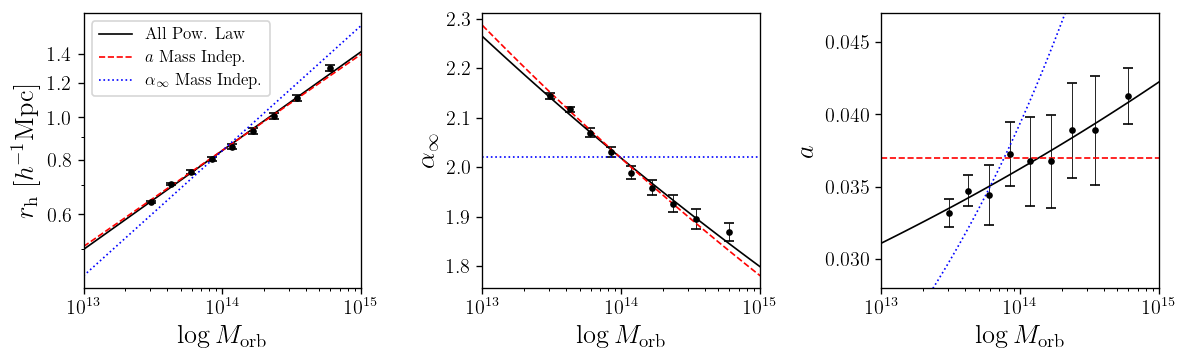

In [18]:
from physhalo.plot.config import SIZE_LABELS, SIZE_LEGEND, SIZE_TICKS

plabels = [r'$r_{\rm h}~[h^{-1}{\rm Mpc}]$', r'$\alpha_{\infty}$', r'$a$']

_, axes = plt.subplots(1, 3, figsize=(10, 3.1))
ax1, ax2, ax3 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(r'$\log M_{\rm orb}$', fontsize=SIZE_LABELS)
    ax.set_xlim(1e13, 1e15)
    ax.set_xscale('log', base=10)
    ax.set_ylabel(plabels[i], fontsize=SIZE_LABELS)
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)
    ax.errorbar(mass, pars[:, i], yerr=errs[:, i], fmt='.', 
                elinewidth=0.5, capsize=3, color='k')

ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[:2]), color='k', 
         lw=1.0, label="All Pow. Law")
ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_2[:2]), color='r', 
         lw=1.0, ls="--", label=r"$a$ Mass Indep.")
ax1.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_3[:2]), color='b', 
         lw=1.0, ls=":", label=r"$\alpha_{\infty}$ Mass Indep.")
ax1.set_yscale('log')
ax1.set_yticks([0.6, 0.8, 1.0, 1.2, 1.4])
ax1.set_yticklabels(['0.6', '0.8', '1.0', '1.2', '1.4'])
ax1.legend(loc="upper left", fontsize=10)

ax2.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[2:4]), color='k', 
         lw=1.0, label="All Pow. Law")
ax2.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_2[2:4]), color='r', 
         lw=1.0, ls="--", label=r"$a$ Mass Indep.")
ax2.hlines(pars_smooth_3[2], 1e13, 1e15, color='b', lw=1.0, ls=":",
           label=r"$\alpha_{\infty}$ Mass Indep.")


ax3.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_1[4:6]), color='k',
         lw=1.0, label="All Pow. Law")
ax3.hlines(pars_smooth_2[4], 1e13, 1e15, color='r', lw=1.0, ls="--",
           label=r"$a$ Mass Indep.")
ax3.plot(mass_pred, power_law(mass_pred/M_PIVOT, *pars_smooth_3[3:5]), color='b',
         lw=1.0, ls=":", label=r"$\alpha_{\infty}$ Mass Indep.")
ax3.set_ylim(0.028, 0.047)
ax3.set_yticks([0.03, 0.035, 0.04, 0.045])

plt.tight_layout();
# plt.savefig(f'figures/orb_fit_pars.png', bbox_inches='tight')
# plt.savefig(f'figures/orb_fit_pars.pdf', bbox_inches='tight')

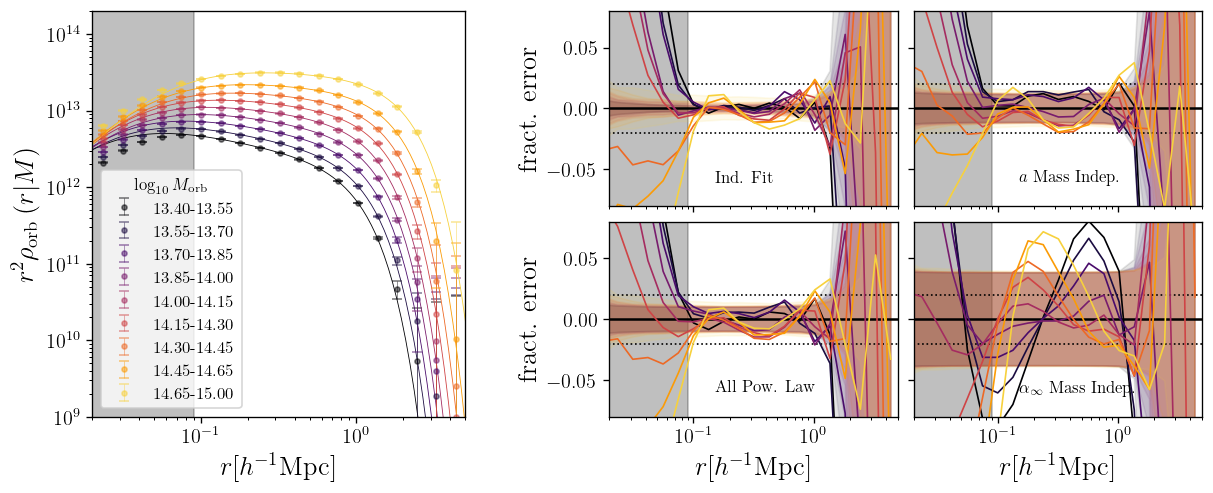

In [41]:
from physhalo.hmcorrfunc.model import rho_orb_model

# Load data
with h5.File(join(SRC_PATH, 'data/xihm_split.h5'), 'r') as hdf_load:
    r = hdf_load['rbins'][()]
    rho = np.zeros((NMBINS, len(r)))
    rho_err = np.zeros((NMBINS, len(r)))
    rho_err_smooth_1 = np.zeros((NMBINS, len(r)))
    rho_err_smooth_2 = np.zeros((NMBINS, len(r)))
    rho_err_smooth_3 = np.zeros((NMBINS, len(r)))
    for k, mbin in enumerate(MBINSTRS):
        rho[k, :] = hdf_load[f'rho/orb/{mbin}'][()]  # y
        rho_err[k, :] = np.sqrt(np.diag(RHOM**2 * hdf_load[f"xi_cov/all/{mbin}"][()]))
        rho_err_smooth_1[k, :] = np.sqrt(np.diag(RHOM**2 * hdf_load[f"xi_cov/all/{mbin}"][()]) + (10**pars_smooth_1[-1]*rho[k, :])**2)
        rho_err_smooth_2[k, :] = np.sqrt(np.diag(RHOM**2 * hdf_load[f"xi_cov/all/{mbin}"][()]) + (10**pars_smooth_2[-1]*rho[k, :])**2)
        rho_err_smooth_3[k, :] = np.sqrt(np.diag(RHOM**2 * hdf_load[f"xi_cov/all/{mbin}"][()]) + (10**pars_smooth_3[-1]*rho[k, :])**2)

# Setup canvas
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 120})     

fig = plt.figure(layout="constrained", figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1., 1.5])

ax = subfigs[0].subplots(1, 1)
# Plot all mass bins.
for k, mbin in enumerate(MBINSTRS):
    # Evaluate model over grid for individual profiles
    r_pred = np.logspace(-2, np.log10(max(r+1)), num=100, base=10)
    rho_pred = rho_orb_model(r_pred, *pars[k, :-1], mass[k])
    
    # Plot data and fitted model
    ax.errorbar(r, r**(2) * rho[k, :], yerr=r**(2) * rho_err[k, :], fmt='.',
                elinewidth=0.5, capsize=3, color=CMAP(k/NMBINS), alpha=0.5,
                label=f'{mbin}')
    ax.plot(r_pred, r_pred**(2) * rho_pred, ls='-', lw=0.5, 
             color=CMAP(k/NMBINS))
    
ax.fill_betweenx([-1, 1e16], 0, 6*RSOFT, color='k', alpha=0.25)
ax.set_xlim(2e-2, 5)
ax.set_xscale('log')
ax.set_xlabel(r'$r [h^{-1}{\rm Mpc}]$', fontsize=SIZE_LABELS)
ax.set_ylim(1e9, 2e14)
ax.set_yscale('log')
ax.set_ylabel(r'$r^2\rho_{\rm orb}\left(r|M\right)$', fontsize=SIZE_LABELS)
ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)
ax.legend(loc='lower left', title=r'$\log_{10}M_{\rm orb}$', fontsize=10)

axes = subfigs[1].subplots(2, 2, sharex=True, sharey=True,
                           gridspec_kw={'hspace': 0, 'wspace': 0})
ax1, ax2, ax3, ax4 = axes.flatten()
in_text = ["Ind. Fit", r"$a$ Mass Indep.", "All Pow. Law", 
           r"$\alpha_{\infty}$ Mass Indep."]
for i, ax in enumerate(axes.flatten()):
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)
    ax.fill_betweenx([-1, 1], 0, 6*RSOFT, color='k', alpha=0.25)
    ax.set_xlim(2e-2, 5)
    ax.set_xscale('log')
    ax.set_ylim(-0.08, 0.08)
    ax.hlines(0, 0, 6, color='k')
    ax.hlines(0.02, 0, 6, color='k', ls=':', lw=1.0)
    ax.hlines(-0.02, 0, 6, color='k', ls=':', lw=1.0)
    ax.text(0.15, -0.06, s=in_text[i])
    
ax1.set_ylabel(r'fract. error', fontsize=SIZE_LABELS)
ax3.set_ylabel(r'fract. error', fontsize=SIZE_LABELS)
ax3.set_xlabel(r'$r [h^{-1}{\rm Mpc}]$', fontsize=SIZE_LABELS)
ax4.set_xlabel(r'$r [h^{-1}{\rm Mpc}]$', fontsize=SIZE_LABELS)

# Plot all mass bins.
for k, mbin in enumerate(MBINSTRS):
    # Evaluate model over grid for smooth profiles
    rh_1 = power_law(mass[k]/M_PIVOT, *pars_smooth_1[:2])
    ainf_1 = power_law(mass[k]/M_PIVOT, *pars_smooth_1[2:4])
    a_1 = power_law(mass[k]/M_PIVOT, *pars_smooth_1[4:6])
    
    rh_2 = power_law(mass[k]/M_PIVOT, *pars_smooth_2[:2])
    ainf_2 = power_law(mass[k]/M_PIVOT, *pars_smooth_2[2:4])
    a_2 = pars_smooth_2[4]
    
    rh_3 = power_law(mass[k]/M_PIVOT, *pars_smooth_3[:2])
    ainf_3 = pars_smooth_3[2]
    a_3 = power_law(mass[k]/M_PIVOT, *pars_smooth_3[3:5])

    ratio = rho_orb_model(r, *pars[k, :-1], mass[k]) / rho[k, :] - 1
    ratio_smooth_1 = rho_orb_model(r, rh_1, ainf_1, a_1, mass[k]) / rho[k, :] - 1
    ratio_smooth_2 = rho_orb_model(r, rh_2, ainf_2, a_2, mass[k]) / rho[k, :] - 1
    ratio_smooth_3 = rho_orb_model(r, rh_3, ainf_3, a_3, mass[k]) / rho[k, :] - 1
    
    # Plot ratio and error bands
    ax1.plot(r, ratio, lw=1, color=CMAP(k/NMBINS))
    ax1.fill_between(r, rho_err[k, :]/rho[k, :], - rho_err[k, :]/rho[k, :], 
                     color=CMAP(k/NMBINS), alpha=0.1)
    
    ax3.plot(r, ratio_smooth_1, lw=1, color=CMAP(k/NMBINS))
    ax3.fill_between(r, rho_err_smooth_1[k, :]/rho[k, :],
                     - rho_err_smooth_1[k, :]/rho[k, :], 
                     color=CMAP(k/NMBINS), alpha=0.1)
    
    ax2.plot(r, ratio_smooth_2, lw=1, color=CMAP(k/NMBINS))
    ax2.fill_between(r, rho_err_smooth_2[k, :]/rho[k, :],
                     - rho_err_smooth_2[k, :]/rho[k, :], 
                     color=CMAP(k/NMBINS), alpha=0.1)
    
    ax4.plot(r, ratio_smooth_3, lw=1, color=CMAP(k/NMBINS))
    ax4.fill_between(r, rho_err_smooth_3[k, :]/rho[k, :],
                     - rho_err_smooth_3[k, :]/rho[k, :], 
                     color=CMAP(k/NMBINS), alpha=0.1)
    
plt.show()